In [1]:
import pandas
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.spatial


# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
# model = hub.load(module_url)
# print ("module %s loaded" % module_url)

In [4]:


def processText(column,n):#to remove stop words,to convert into lowercase and root word
    import re

    corpus = []
    for i in range(n):
        review = re.sub('[^a-zA-Z]', ' ', column[i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        all_stopwords.remove('not')
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        review = ' '.join(review)
        corpus.append(review)
    return corpus


In [7]:


df = pandas.read_csv('./'+'MSFT_combine.csv')


df=df.dropna()
df = df[~(df['datetime'] >= '2023-01-01')]#dropping rows of year=2023

df=df.reset_index(drop=True)


print(df.columns)

titleColumn=df['title']
summaryColumn=df['summary']
dateColumn=df['datetime']
titleColumn=list(titleColumn)
summaryColumn=list(summaryColumn)

corpus=processText(titleColumn,len(titleColumn))#preprocessing title column
df['title']=corpus

summaryCorpus=processText(summaryColumn,len(summaryColumn))#preprocessing summary column
df['summary']=summaryCorpus


df = df.astype({'title':'string'})
df = df.astype({'summary':'string'})

print(df.tail(5))

Index(['datetime', 'close', 'open', 'low', 'high', 'volume', 'y_actual', 'evm',
       'force_index', 'rsi', 'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3',
       'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Free Cash Flow', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'summary', 'title'],
      dtype='object')
       datetime       close        open         low        high      volume  \
969  2022-12-22  237.594894  241.259995  233.869995  241.990005  28651700.0   
970  2022-12-23  238.133545  236.110001  233.940002  238.869995  21207000.0   
971  2022-12-27  236.367981  238.699997  235.830002  238.929993  16688600.0   
972  2022-12-28  233.944031  236.889999  234.169998  239.720001  17457100.0   
973  2022-12-29  240.407837  235.649994  235.649994  241.919998  19770700.0   



In [8]:
df.shape

(974, 29)

In [9]:
titleColumn=df['title']
titleColumn[0]

# df=df.fillna(0)

# df=df.dropna()

'author demand social network india scan pictur mspowerus microsoft surfac laptop review great laptop pcworld cabinet approv set microsoft global data centr qatar peninsula xbox live server statu latest microsoft confirm x dd sign issu express myanalyt avail offic microsoft suit neowin microsoft get approv open data center qatar mspowerus microsoft quietli updat window mix realiti ui mspowerus multipl microsoft patent point xbox one control improv windowslatest microsoft graph everyth develop need know techgenix microsoft announc two new microsoft secur mspowerus creat form microsoft form adjust set thewindowsclub qatar cabinet approv microsoft azur data center datacenterdynam compani best code qualiti googl appl microsoft amazon forb microsoft ceo satya nadella led compani biggest turnaround financi express microsoft bali data bank help user manag data bleepingcomput microsoft edg io beta bring pictur pictur msn kid bleepingcomput microsoft retir microsoft virtual academi replac micro

In [10]:
summaryColumn=df['summary']
summaryColumn[0]

'put us surfac headphon test hand review nenter surfac headphon microsoft announc surfac event last octob nnonetheless surfac headphon feel pleasantli light mostli plastic design help feel comfort worn nthe headphon current avail surfac gray product manag event would say anyth whether microsoft plan releas surfac headphon colour nhowev refer surfac devic also avail colour mention headphon black help surfac headphon stand paradox microsoft team offer one mod solut across pc xbox one nparadox interact microsoft announc surpris new joint project today titl paradox mod nbill first ever open mod platform enabl distribut user creat game modif mod across multipl platform paradox mod free offer xbox one pc nto get thing roll paradox mod alreadi avail part free updat paradox interact surviv strategi game surviv mar nparadox mod support come game later time first time player abl add modifi content consol game nparadox follow similar mod program xbox one version citi skylin earli last year nmod u

In [11]:
df.head(5)

,datetime,close,open,low,high,volume,y_actual,evm,force_index,rsi,...,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,summary,title
0,2019-02-20,102.832375,107.860001,106.290001,107.940002,21607700.0,1.0,0.898049,2.534889e+07,57.981282,...,52185000.0,-15773000.0,-36887000.0,38260000.0,286556000.0,184226000.0,102330000.0,168992000.0,put us surfac headphon test hand review nenter...,author demand social network india scan pictur...
1,2019-02-21,105.001297,106.900002,106.870003,109.480003,29063200.0,1.0,1.880497,1.512891e+08,63.482724,...,52185000.0,-15773000.0,-36887000.0,38260000.0,286556000.0,184226000.0,102330000.0,168992000.0,seattl seahawk star russel wilson alreadi earn...,microsoft co founder paul allen taught nfl sta...
2,2019-02-22,106.498444,110.050003,109.820000,111.199997,27763200.0,1.0,3.052486,2.298640e+08,66.721646,...,52185000.0,-15773000.0,-36887000.0,38260000.0,286556000.0,184226000.0,102330000.0,168992000.0,idea insert tabl content toc microsoft word nr...,easi way insert tabl content refer microsoft w...
3,2019-02-25,107.093452,111.760002,111.260002,112.180000,23750600.0,1.0,2.654672,1.435915e+08,67.938747,...,52185000.0,-15773000.0,-36887000.0,38260000.0,286556000.0,184226000.0,102330000.0,168992000.0,microsoft introduc help featur microsoft windo...,microsoft add calendar categori color latest o...
4,2019-02-26,107.832413,111.260002,111.169998,113.239998,21536700.0,0.0,2.189771,1.156615e+08,69.433904,...,52185000.0,-15773000.0,-36887000.0,38260000.0,286556000.0,184226000.0,102330000.0,168992000.0,build work launch client microsoft tripism emp...,microsoft tripism pioneer account specif suppl...


In [12]:
df.tail(5)

,datetime,close,open,low,high,volume,y_actual,evm,force_index,rsi,...,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,summary,title
969,2022-12-22,237.594894,241.259995,233.869995,241.990005,28651700.0,1.0,-20.631162,-4.810033e+08,43.552560,...,89035000.0,-30311000.0,-58876000.0,65149000.0,364840000.0,198298000.0,166542000.0,213574000.0,jan save popular pc game like flight simul ore...,microsoft store game deal save elden ring flig...
970,2022-12-23,238.133545,236.110001,233.940002,238.869995,21207000.0,0.0,-19.766353,-2.426366e+08,44.140512,...,89035000.0,-30311000.0,-58876000.0,65149000.0,364840000.0,198298000.0,166542000.0,213574000.0,microsoft introduc new type meet microsoft tea...,new meet style come microsoft team uc today an...
971,2022-12-27,236.367981,238.699997,235.830002,238.929993,16688600.0,0.0,-10.456715,-1.358383e+08,42.575151,...,89035000.0,-30311000.0,-58876000.0,65149000.0,364840000.0,198298000.0,166542000.0,213574000.0,career cybersecur everyon truli foundat digit ...,oop microsoft accident reveal window new inter...
972,2022-12-28,233.944031,236.889999,234.169998,239.720001,17457100.0,1.0,-6.437158,-1.713487e+08,40.454037,...,89035000.0,-30311000.0,-58876000.0,65149000.0,364840000.0,198298000.0,166542000.0,213574000.0,advertisementa decad technolog abund end year ...,big tech predict twitter googl microsoft amazo...
973,2022-12-29,240.407837,235.649994,235.649994,241.919998,19770700.0,0.0,-5.346243,-1.260192e+08,47.907113,...,89035000.0,-30311000.0,-58876000.0,65149000.0,364840000.0,198298000.0,166542000.0,213574000.0,microsoft prepar sever big featur updat window...,microsoft plan deliv sever window updat new fe...


In [13]:
df.columns

Index(['datetime', 'close', 'open', 'low', 'high', 'volume', 'y_actual', 'evm',
       'force_index', 'rsi', 'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3',
       'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Free Cash Flow', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'summary', 'title'],
      dtype='object')

In [14]:
df['y_actual']

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
969    1.0
970    0.0
971    0.0
972    1.0
973    0.0
Name: y_actual, Length: 974, dtype: float64

In [15]:
y=df['y_actual']
# y=np.array(y)
y

0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
969    1.0
970    0.0
971    0.0
972    1.0
973    0.0
Name: y_actual, Length: 974, dtype: float64

In [16]:
column_names=["y_actual"]

# Create DataFrame by assigning column names
y_df=pd.DataFrame(y, columns=column_names)

In [17]:
y_df

,y_actual
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
969,1.0
970,0.0
971,0.0
972,1.0


In [18]:
# headers = ['y_lables']
# y_df = pd.DataFrame(y, columns=headers)
y_df['datetime']=df['datetime']

In [19]:
y_df.head(5)

,y_actual,datetime
0,1.0,2019-02-20
1,1.0,2019-02-21
2,1.0,2019-02-22
3,1.0,2019-02-25
4,0.0,2019-02-26


In [20]:
y_df.shape

(974, 2)

In [21]:
y_df.tail(5)

,y_actual,datetime
969,1.0,2022-12-22
970,0.0,2022-12-23
971,0.0,2022-12-27
972,1.0,2022-12-28
973,0.0,2022-12-29


In [22]:
# df_title=df[['datetime','title']]
df=df.drop(['datetime','title','summary','y_actual'],axis='columns')#dropping the date column


In [23]:
# scalar = StandardScaler()
# scaled_df = scalar.fit_transform(df) #scaling the csv data

# df=scaled_df


In [24]:
from sklearn.preprocessing import MinMaxScaler
 
 
# scale features
scaler = MinMaxScaler()
# model=scaler.fit(df)
# scaled_data=model.transform(df)

scaled_data=scaler.fit_transform(df)
 
# print scaled features
df=scaled_data
# print(scaled_data)

In [25]:
df=pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [26]:
df.shape

(974, 25)

In [27]:
from textblob import TextBlob

In [28]:
titleSentiment=[]

In [29]:
for content in titleColumn:
    blob = TextBlob(content)
    sentiment=blob.sentiment.polarity
    if sentiment<0:
      titleSentiment.append(0)
    else:
      titleSentiment.append(1)

In [30]:
summarySentiment=[]

In [31]:
for content in summaryColumn:
    blob = TextBlob(content)
    sentiment=blob.sentiment.polarity
    if sentiment<0:
      summarySentiment.append(0)
    else:
      summarySentiment.append(1)

In [32]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [45]:

text_vector=[]# will contain vector representation of titleColumn
summary_vector=[]

In [46]:
# Python3 code for preprocessing text
import nltk
import re
import numpy as np
import nltk
nltk.download('punkt')


# execute the text here as :
# text = """ # place text here """

# dataset = nltk.sent_tokenize(titleColumn)

dataset=[]

for text in titleColumn:
    dataset.append(str(nltk.sent_tokenize(text)))

for i in range(len(dataset)):
	dataset[i] = dataset[i].lower()
	dataset[i] = re.sub(r'\W', ' ', dataset[i])
	dataset[i] = re.sub(r'\s+', ' ', dataset[i])


print(dataset[0])


# Creating the Bag of Words model
word2count = {}
for data in dataset:
	words = nltk.word_tokenize(data)
	for word in words:
		if word not in word2count.keys():
			word2count[word] = 1
		else:
			word2count[word] += 1

import heapq
freq_words = heapq.nlargest(100, word2count, key=word2count.get)

X = []
for data in dataset:
	vector = []
	for word in freq_words:
		if word in nltk.word_tokenize(data):
			vector.append(1)
		else:
			vector.append(0)
	X.append(vector)
X = np.asarray(X)

text_vector=X

print(text_vector)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 author demand social network india scan pictur mspowerus microsoft surfac laptop review great laptop pcworld cabinet approv set microsoft global data centr qatar peninsula xbox live server statu latest microsoft confirm x dd sign issu express myanalyt avail offic microsoft suit neowin microsoft get approv open data center qatar mspowerus microsoft quietli updat window mix realiti ui mspowerus multipl microsoft patent point xbox one control improv windowslatest microsoft graph everyth develop need know techgenix microsoft announc two new microsoft secur mspowerus creat form microsoft form adjust set thewindowsclub qatar cabinet approv microsoft azur data center datacenterdynam compani best code qualiti googl appl microsoft amazon forb microsoft ceo satya nadella led compani biggest turnaround financi express microsoft bali data bank help user manag data bleepingcomput microsoft edg io beta bring pictur pictur msn kid bleepingcomput microsoft retir microsoft virtual academi replac micro

In [47]:
dataset=[]

for text in summaryColumn:
    dataset.append(str(nltk.sent_tokenize(text)))

for i in range(len(dataset)):
	dataset[i] = dataset[i].lower()
	dataset[i] = re.sub(r'\W', ' ', dataset[i])
	dataset[i] = re.sub(r'\s+', ' ', dataset[i])


print(dataset[0])


# Creating the Bag of Words model
word2count = {}
for data in dataset:
	words = nltk.word_tokenize(data)
	for word in words:
		if word not in word2count.keys():
			word2count[word] = 1
		else:
			word2count[word] += 1

import heapq
freq_words = heapq.nlargest(100, word2count, key=word2count.get)

X = []
for data in dataset:
	vector = []
	for word in freq_words:
		if word in nltk.word_tokenize(data):
			vector.append(1)
		else:
			vector.append(0)
	X.append(vector)
X = np.asarray(X)

summary_vector=X

print(summary_vector)

 put us surfac headphon test hand review nenter surfac headphon microsoft announc surfac event last octob nnonetheless surfac headphon feel pleasantli light mostli plastic design help feel comfort worn nthe headphon current avail surfac gray product manag event would say anyth whether microsoft plan releas surfac headphon colour nhowev refer surfac devic also avail colour mention headphon black help surfac headphon stand paradox microsoft team offer one mod solut across pc xbox one nparadox interact microsoft announc surpris new joint project today titl paradox mod nbill first ever open mod platform enabl distribut user creat game modif mod across multipl platform paradox mod free offer xbox one pc nto get thing roll paradox mod alreadi avail part free updat paradox interact surviv strategi game surviv mar nparadox mod support come game later time first time player abl add modifi content consol game nparadox follow similar mod program xbox one version citi skylin earli last year nmod u

In [466]:
# for text in titleColumn:
#     sentence = text
#     message_embeddings = embed([sentence])
#     temp=np.array(message_embeddings[0])
#     temp=temp.T
#     text_vector.append(temp)


In [467]:
# for summary in summaryColumn:
#     sentence = summary
#     message_embeddings = embed([sentence])
#     temp=np.array(message_embeddings[0])
#     temp=temp.T
#     summary_vector.append(temp)

In [48]:
text_vector=np.array(text_vector)
summary_vector=np.array(summary_vector)

In [49]:
text_vector.shape

(974, 100)

In [50]:
summary_vector.shape

(974, 100)

In [471]:

# scalar = StandardScaler()
# scaled_data_text = scalar.fit_transform(text_vector) #scaling the data


In [51]:
scaler = MinMaxScaler()
scaled_data_text=scaler.fit_transform(text_vector)
# scaled_data_text=model.transform(text_vector)
 
# print scaled features
# print(scaled_data)

In [473]:
# scalar = StandardScaler()
# scaled_data_summary = scalar.fit_transform(summary_vector) #scaling the data

In [52]:
scaler = MinMaxScaler()
scaled_data_summary=scaler.fit_transform(summary_vector)
# scaled_data_summary=model.transform(summary_vector)
 
# print scaled features
# print(scaled_data)

In [53]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [54]:
pca = PCA(n_components = 30)
pca.fit(scaled_data_text)
data_pca_text = pca.transform(scaled_data_text)
data_pca_text

array([[ 5.95177914,  0.14356016, -0.36418964, ...,  0.30282219,
        -0.2370436 , -0.34410893],
       [-1.38739571, -0.23104735, -0.84605508, ..., -0.16675697,
        -0.61306319,  0.19729784],
       [-1.13584833,  0.10181645, -0.04377024, ..., -0.76533293,
        -0.09168555, -0.13247294],
       ...,
       [-0.24244647, -0.47576212,  0.39578329, ..., -0.34737753,
        -0.81803655, -0.51759704],
       [-1.38431437, -0.62331162, -0.09891216, ...,  0.16552544,
        -0.17754402, -0.25721311],
       [ 0.33715349, -0.39572616, -0.08789134, ..., -0.53584203,
        -0.54244036, -0.45241568]])

In [55]:
pca = PCA(n_components = 30)
pca.fit(scaled_data_summary)
data_pca_summary = pca.transform(scaled_data_summary)
data_pca_summary

array([[ 0.29774026, -0.34654225,  0.16991308, ...,  0.42389911,
         0.07167828,  0.50403381],
       [ 1.19373299,  0.90915223,  0.71486037, ..., -0.70469635,
         0.56910947, -0.01511699],
       [ 1.68474691, -0.20081529, -0.33592235, ..., -0.16127188,
        -0.11566537,  1.37609638],
       ...,
       [ 1.40453282, -0.88654128,  0.60402476, ..., -0.47395554,
         0.51019343,  0.09167649],
       [ 3.54545931, -0.51589467,  0.06978582, ..., -0.03664482,
         0.02965922,  0.07837449],
       [ 0.02126265,  0.43435321,  0.19064345, ...,  0.09302701,
         0.37795162,  0.02717922]])

In [56]:
data_pca_text.shape

(974, 30)

In [57]:
data_pca_summary.shape

(974, 30)

In [58]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [59]:
# text_vector_dataframe=pd.DataFrame()
type(data_pca_text)
# df_news  =pd.DataFrame(((x,) for x in data_pca), columns=['title'])
mycolumns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22','pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30']
df_news_text=pd.DataFrame(data_pca_text, columns = mycolumns)

In [60]:
# text_vector_dataframe=pd.DataFrame()
type(data_pca_summary)
# df_news  =pd.DataFrame(((x,) for x in data_pca), columns=['title'])
mycolumns=['Spca1','Spca2','Spca3','Spca4','Spca5','Spca6','Spca7','Spca8','Spca9','Spca10','Spca11','Spca12','Spca13','Spca14','Spca15','Spca16','Spca17','Spca18','Spca19','Spca20','Spca21','Spca22','Spca23','Spca24','Spca25','Spca26','Spca27','Spca28','Spca29','Spca30']
df_news_summary=pd.DataFrame(data_pca_summary, columns = mycolumns)

In [61]:
df_news_text

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30
0,5.951779,0.143560,-0.364190,0.234275,0.399735,0.339708,0.052073,0.402280,-0.066991,-0.160701,...,0.074775,-0.348426,-0.428316,0.008190,-0.025869,0.090528,-0.188193,0.302822,-0.237044,-0.344109
1,-1.387396,-0.231047,-0.846055,-0.217241,-0.010524,1.112995,-0.114949,0.374415,0.068442,-0.306034,...,-0.247851,-0.883222,0.247184,0.328834,-0.295619,0.152176,0.042274,-0.166757,-0.613063,0.197298
2,-1.135848,0.101816,-0.043770,-0.654464,-0.591292,-0.231150,0.059873,0.558307,0.391951,-0.857837,...,-0.335195,-0.315161,0.080545,0.095314,-0.155606,-0.074377,-0.024808,-0.765333,-0.091686,-0.132473
3,0.295306,0.485719,-0.309510,-0.416310,-0.091590,-0.431832,0.705140,-0.002554,0.358182,0.546229,...,0.132614,-0.144274,0.111240,-0.327494,0.199677,0.156894,-0.278230,0.190455,-0.575015,0.008217
4,-0.590093,-0.438281,-0.768769,0.195320,1.253639,0.557455,0.008671,-1.065589,-0.739077,-0.337984,...,0.122967,-0.680498,-0.574986,-0.318975,0.766641,0.030372,-0.038312,0.913921,-0.920627,-0.689457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,-0.631046,0.217453,1.783851,0.609676,0.693483,0.640236,-0.197517,0.939811,0.535804,0.054644,...,-1.114764,-0.380178,0.378056,0.528106,-0.595321,-0.657174,0.584240,0.184084,-0.190548,0.056011
970,-1.485545,-0.463282,0.009497,0.568795,0.383519,-0.514293,0.809688,-0.885401,-0.105043,0.443325,...,0.334007,0.495850,0.463187,-0.117199,-0.013152,-0.624308,-0.159829,0.413802,-0.087907,-0.002134
971,-0.242446,-0.475762,0.395783,0.676766,1.118048,-0.235368,0.197442,0.539932,-0.293946,0.665504,...,-0.152070,0.333669,-0.580410,0.868376,0.462655,-0.673055,-0.691526,-0.347378,-0.818037,-0.517597
972,-1.384314,-0.623312,-0.098912,-0.232589,0.623014,1.186589,0.590283,-0.203517,0.346634,-0.301102,...,-0.884675,-0.657901,0.289425,-0.328003,-0.643377,0.225719,0.562199,0.165525,-0.177544,-0.257213


In [62]:
df_news_summary

,Spca1,Spca2,Spca3,Spca4,Spca5,Spca6,Spca7,Spca8,Spca9,Spca10,...,Spca21,Spca22,Spca23,Spca24,Spca25,Spca26,Spca27,Spca28,Spca29,Spca30
0,0.297740,-0.346542,0.169913,-0.273011,-0.858283,0.438673,0.329851,-0.918098,-0.263137,0.016768,...,0.573269,-0.819357,-0.574567,0.841021,0.416753,0.996739,-0.573971,0.423899,0.071678,0.504034
1,1.193733,0.909152,0.714860,0.143727,0.025719,0.751571,0.227148,-1.027419,0.475644,0.387725,...,-0.948813,0.038555,-0.344341,0.464237,-0.661891,0.471559,-0.621371,-0.704696,0.569109,-0.015117
2,1.684747,-0.200815,-0.335922,-0.782201,-0.704381,0.709385,0.106215,0.341768,0.347355,-0.166026,...,-0.648674,-0.250261,0.031448,0.063175,-0.860639,-0.039741,0.014663,-0.161272,-0.115665,1.376096
3,1.206785,0.133152,-0.801415,-0.727199,-0.322061,-1.179398,0.685052,-0.780976,0.615064,0.101116,...,-0.306548,0.312762,0.477253,0.131132,0.164834,-0.085244,-0.038898,0.146484,-0.176355,-0.295360
4,0.139745,0.618717,0.483486,-1.155788,0.492042,-0.429418,-0.674800,-0.339755,-0.268689,-0.940616,...,1.438521,-0.694277,0.570617,-0.912678,0.264096,-0.270361,-0.529025,-0.824094,0.226099,0.501805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.244729,-0.019759,-1.314395,-0.181057,0.707623,0.819799,-0.306445,0.362836,0.560820,-0.652427,...,0.116145,0.586775,-0.400227,-0.795845,-0.697970,-0.337845,0.349882,-0.768474,-0.121989,-0.157131
970,2.740881,-0.817264,0.308153,0.183142,1.339223,-0.204296,0.507369,-0.264095,0.330886,-0.815887,...,0.588878,-0.868436,1.652798,0.456073,-0.108104,0.374286,-0.668938,-0.276498,-0.658877,0.189428
971,1.404533,-0.886541,0.604025,-0.373483,-0.040006,1.796488,0.124658,0.345071,-0.189791,-0.280154,...,1.318775,0.238926,-0.157393,-0.785022,-0.689404,-0.820963,-0.163130,-0.473956,0.510193,0.091676
972,3.545459,-0.515895,0.069786,1.315213,-0.765616,-0.914231,-0.002174,-0.718681,0.326308,0.230529,...,-0.589791,-0.039510,1.237484,-1.246468,0.870098,-0.309913,-0.276102,-0.036645,0.029659,0.078374


In [63]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [64]:
df.columns

RangeIndex(start=0, stop=25, step=1)

In [65]:
df=np.array(df)

In [66]:
column=['close', 'open', 'low', 'high', 'volume','evm',  'force_index', 'rsi', 'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3',
  'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',  'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
   'Free Cash Flow', 'Total Assets',  'Total Liabilities Net Minority Interest', 'Total Equity Gross Minority Interest', 'Total Capitalization']

df=pd.DataFrame(df,columns=column)
    #  'volume', 'y_actual', 'evm',
#    ,'titleSentiment','summarySentiment'

In [67]:
df

,close,open,low,high,volume,evm,force_index,rsi,cci,macd-signal,...,Gross Profit,Normalized EBITDA,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.0,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,1.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.00000,1.0,1.0


In [68]:
df['titleSentiment']=titleSentiment

In [69]:
df['summarySentiment']=summarySentiment

In [70]:
# df=df.drop(['y_actual'],axis='columns')
df.columns

Index(['close', 'open', 'low', 'high', 'volume', 'evm', 'force_index', 'rsi',
       'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3', 'Total Revenue',
       'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Free Cash Flow', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'titleSentiment', 'summarySentiment'],
      dtype='object')

In [71]:
df.head(5)

,close,open,low,high,volume,evm,force_index,rsi,cci,macd-signal,...,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Total Assets,Total Liabilities Net Minority Interest,Total Equity Gross Minority Interest,Total Capitalization,titleSentiment,summarySentiment
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0,1,1
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0,1,1
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0,0,1
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0,0,0
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,0.0,0.803737,1.0,0.0,0.0,0.07972,0.0,0.0,1,1


In [72]:
newDF=pd.concat([dateColumn,df,df_news_text,df_news_summary],axis=1)


In [73]:
newDF.shape

(974, 88)

In [74]:
newDF.head(5)

,datetime,close,open,low,high,volume,evm,force_index,rsi,cci,...,Spca21,Spca22,Spca23,Spca24,Spca25,Spca26,Spca27,Spca28,Spca29,Spca30
0,2019-02-20,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,...,0.573269,-0.819357,-0.574567,0.841021,0.416753,0.996739,-0.573971,0.423899,0.071678,0.504034
1,2019-02-21,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,...,-0.948813,0.038555,-0.344341,0.464237,-0.661891,0.471559,-0.621371,-0.704696,0.569109,-0.015117
2,2019-02-22,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,...,-0.648674,-0.250261,0.031448,0.063175,-0.860639,-0.039741,0.014663,-0.161272,-0.115665,1.376096
3,2019-02-25,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,...,-0.306548,0.312762,0.477253,0.131132,0.164834,-0.085244,-0.038898,0.146484,-0.176355,-0.295360
4,2019-02-26,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,...,1.438521,-0.694277,0.570617,-0.912678,0.264096,-0.270361,-0.529025,-0.824094,0.226099,0.501805


In [75]:
newDF.columns

Index(['datetime', 'close', 'open', 'low', 'high', 'volume', 'evm',
       'force_index', 'rsi', 'cci', 'macd-signal', 'atr', 'vwap', 'stx_7_3',
       'Total Revenue', 'Cost of Revenue', 'Gross Profit', 'Normalized EBITDA',
       'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow',
       'Free Cash Flow', 'Total Assets',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest', 'Total Capitalization',
       'titleSentiment', 'summarySentiment', 'pca1', 'pca2', 'pca3', 'pca4',
       'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12',
       'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20',
       'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29', 'pca30', 'Spca1', 'Spca2', 'Spca3', 'Spca4', 'Spca5', 'Spca6',
       'Spca7', 'Spca8', 'Spca9', 'Spca10', 'Spca11', 'Spca12', 'Spca13',
       'Spca14', 'Spca15', 'Spca16', 'Spca17', 'Spca18', 'Spca19', 'Spca20'

Start applying model after this.

Take data before 2022-9-30 as training and after as testing.


In [76]:
file_train = newDF[(newDF['datetime'] <'2022-01-01')]
file_test = newDF[(newDF['datetime'] >='2022-01-01')]
y_df_train = y_df[(y_df['datetime'] <'2022-01-01')]
y_df_test = y_df[(y_df['datetime'] >='2022-01-01')]
print("train x: ",file_train.shape,"train y: ",y_df_train.shape)
print("test x: ",file_test.shape,"test y: ",y_df_test.shape)



train x:  (724, 88) train y:  (724, 2)
test x:  (250, 88) test y:  (250, 2)


In [77]:
file_train = file_train.drop('datetime', axis=1)
# file_train = file_train.drop('title', axis=1)
file_test = file_test.drop('datetime', axis=1)
y_df_train = y_df_train.drop('datetime', axis=1)
y_df_test = y_df_test.drop('datetime', axis=1)
file_train

,close,open,low,high,volume,evm,force_index,rsi,cci,macd-signal,...,Spca21,Spca22,Spca23,Spca24,Spca25,Spca26,Spca27,Spca28,Spca29,Spca30
0,0.000000,0.004038,0.000000,0.000000,0.143354,0.592786,0.712140,0.542931,0.660304,0.569380,...,0.573269,-0.819357,-0.574567,0.841021,0.416753,0.996739,-0.573971,0.423899,0.071678,0.504034
1,0.009181,0.000000,0.002459,0.006371,0.228053,0.599654,0.736992,0.637608,0.766912,0.583657,...,-0.948813,0.038555,-0.344341,0.464237,-0.661891,0.471559,-0.621371,-0.704696,0.569109,-0.015117
2,0.015518,0.013251,0.014963,0.013486,0.213284,0.607847,0.752497,0.693349,0.898087,0.602614,...,-0.648674,-0.250261,0.031448,0.063175,-0.860639,-0.039741,0.014663,-0.161272,-0.115665,1.376096
3,0.018037,0.020444,0.021067,0.017540,0.167698,0.605066,0.735473,0.714294,0.874076,0.615645,...,-0.306548,0.312762,0.477253,0.131132,0.164834,-0.085244,-0.038898,0.146484,-0.176355,-0.295360
4,0.021165,0.018341,0.020686,0.021925,0.142547,0.601816,0.729962,0.740025,0.819237,0.625507,...,1.438521,-0.694277,0.570617,-0.912678,0.264096,-0.270361,-0.529025,-0.824094,0.226099,0.501805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0.997239,0.961467,0.971303,0.970256,0.124487,0.818150,0.770387,0.566327,0.731740,0.590666,...,0.025244,-0.254289,0.149350,-0.006718,-0.095459,-0.214435,-1.007932,-0.524803,0.765898,0.075820
720,0.992219,0.993816,0.992031,0.975758,0.075801,0.764587,0.726471,0.546691,0.734025,0.654387,...,0.680662,0.272229,-0.527870,-0.371973,-0.503022,-0.755248,0.621725,0.786823,-0.009144,-0.104911
721,0.995148,0.986034,0.989318,0.977785,0.068763,0.761541,0.727613,0.555277,0.708799,0.693800,...,-0.262520,0.387436,0.270442,0.111742,0.783924,-0.005031,0.673241,-0.156869,-0.164250,-0.244985
722,0.984146,0.988600,0.985672,0.972945,0.079584,0.736539,0.726539,0.508743,0.663713,0.684831,...,0.324235,-0.653262,0.181437,-0.136888,-0.045562,-0.839700,-0.351702,0.576309,0.182153,-0.697191


In [78]:
file_test

,close,open,low,high,volume,evm,force_index,rsi,cci,macd-signal,...,Spca21,Spca22,Spca23,Spca24,Spca25,Spca26,Spca27,Spca28,Spca29,Spca30
724,0.965029,0.961005,0.947353,0.951723,0.225802,0.580840,0.680964,0.430409,0.573625,0.593893,...,0.717096,0.326040,0.405311,-0.666630,-0.444712,-0.285070,0.761915,0.765689,-0.617557,-0.159275
725,0.941017,0.958817,0.931838,0.940140,0.269077,0.678712,0.711407,0.338842,0.496114,0.505782,...,-0.305840,-0.231288,0.190602,0.283046,0.215956,-0.460472,0.827141,0.368645,-0.480563,-0.990784
726,0.888184,0.921084,0.888856,0.902370,0.352918,0.550429,0.564432,0.182598,0.341550,0.333869,...,0.198996,0.422313,0.323547,-0.429678,-0.020045,0.088517,0.023735,0.042773,0.148014,0.200048
727,0.877726,0.867617,0.869823,0.871882,0.348281,0.495700,0.621939,0.156926,0.311959,0.212460,...,0.129049,0.309833,-0.529285,0.091023,-0.331059,-0.397662,-0.408227,-0.448419,-0.982160,-0.057864
728,0.878396,0.871824,0.863889,0.862781,0.269596,0.548712,0.644863,0.159995,0.323634,0.154396,...,-0.286953,-0.472204,0.021404,0.160713,-0.113819,-0.178685,-0.514025,0.352053,0.086587,-0.398041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570440,0.565203,0.540799,0.554544,0.223378,0.442286,0.612222,0.294620,0.317915,0.307356,...,0.116145,0.586775,-0.400227,-0.795845,-0.697970,-0.337845,0.349882,-0.768474,-0.121989,-0.157131
970,0.572720,0.543539,0.541096,0.541637,0.138802,0.448332,0.659259,0.304739,0.329265,0.291684,...,0.588878,-0.868436,1.652798,0.456073,-0.108104,0.374286,-0.668938,-0.276498,-0.658877,0.189428
971,0.565246,0.554434,0.549108,0.541886,0.087470,0.513411,0.680333,0.277800,0.366969,0.276699,...,1.318775,0.238926,-0.157393,-0.785022,-0.689404,-0.820963,-0.163130,-0.473956,0.510193,0.091676
972,0.554986,0.546820,0.542071,0.545154,0.096200,0.541510,0.673326,0.241296,0.374807,0.257395,...,-0.589791,-0.039510,1.237484,-1.246468,0.870098,-0.309913,-0.276102,-0.036645,0.029659,0.078374


In [79]:
y_df_train

,y_actual
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
719,0.0
720,1.0
721,0.0
722,0.0


In [80]:
y_df_test

,y_actual
724,0.0
725,0.0
726,0.0
727,1.0
728,1.0
...,...
969,1.0
970,0.0
971,0.0
972,1.0


In [81]:
print(y_df_test)

     y_actual
724       0.0
725       0.0
726       0.0
727       1.0
728       1.0
..        ...
969       1.0
970       0.0
971       0.0
972       1.0
973       0.0

[250 rows x 1 columns]


In [82]:
type(file_train)
file_train = file_train.to_numpy()

In [83]:
type(file_test)
file_test = file_test.to_numpy()

In [84]:
type(y_df_train)
y_df_train = y_df_train.to_numpy()

In [85]:
type(y_df_test)
y_df_test = y_df_test.to_numpy()

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report




baseline_LR = LogisticRegression(C = 1e10, tol=0.000000001, max_iter=100000)
baseline_LR.fit(file_train, y_df_train)
    # print('Coefficients: \n', baseline_LR.coef_)
print("training accracy: %.4f" % baseline_LR.score(file_train, y_df_train))
print("test accuracy: %.4f" % baseline_LR.score(file_test, y_df_test))
pred= baseline_LR.predict(file_train)
y_fit_LR = baseline_LR.predict(file_test)
print(type(y_fit_LR))
# print(y_fit_LR)
# print(y_df_test)
print('Accuracy:', accuracy_score(y_df_test, y_fit_LR))
print('ROC AUC Score:', roc_auc_score(y_df_test, y_fit_LR))
print('F1 score:', f1_score(y_df_test, y_fit_LR))
print()
print('\n clasification report training:\n', classification_report(y_df_train, pred))
print('\n confussion matrix:\n',confusion_matrix(y_df_train, pred))

print('\n clasification report testing:\n', classification_report(y_df_test, y_fit_LR))
print('\n confussion matrix:\n',confusion_matrix(y_df_test, y_fit_LR))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training accracy: 0.6575
test accuracy: 0.5040
<class 'numpy.ndarray'>
Accuracy: 0.504
ROC AUC Score: 0.5083633556356151
F1 score: 0.515625


 clasification report training:
               precision    recall  f1-score   support

         0.0       0.64      0.51      0.57       317
         1.0       0.67      0.77      0.72       407

    accuracy                           0.66       724
   macro avg       0.65      0.64      0.64       724
weighted avg       0.65      0.66      0.65       724


 confussion matrix:
 [[162 155]
 [ 93 314]]

 clasification report testing:
               precision    recall  f1-score   support

         0.0       0.55      0.45      0.49       134
         1.0       0.47      0.57      0.52       116

    accuracy                           0.50       250
   macro avg       0.51      0.51      0.50       250
weighted avg       0.51      0.50      0.50       250


 confussion matrix:
 [[60 74]
 [50 66]]


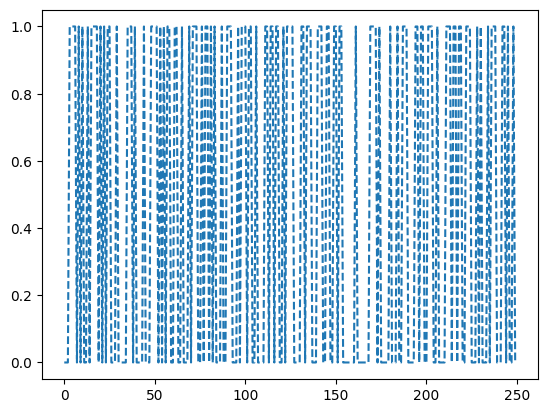

In [87]:
list1=y_df_test.tolist()
plt.plot(list1,linestyle = '--')
plt.show()

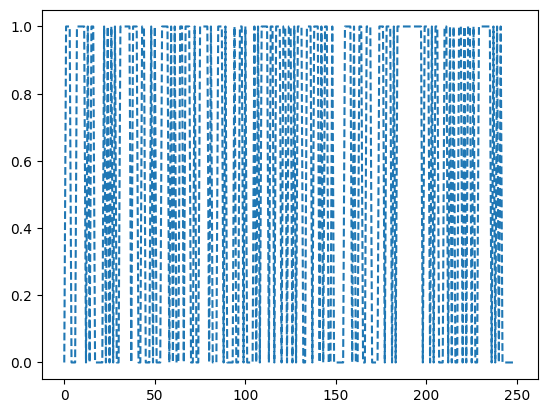

In [88]:
list2=y_fit_LR.tolist()
plt.plot(list2,linestyle = '--')
plt.show()

In [89]:
# print(y_df_test)
type(y_df_test)


numpy.ndarray

In [90]:
y_df_test.shape

(250, 1)

In [91]:
print(y_fit_LR)
print(type(y_fit_LR))


[0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.ndarray'>


In [92]:
y_fit_LR.shape

(250,)

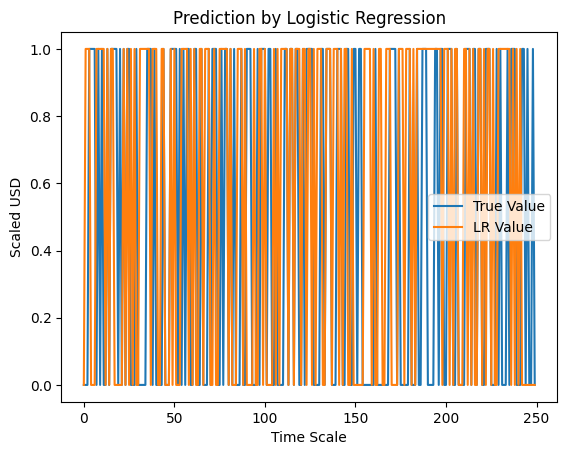

In [93]:
#Predicted vs True Adj Close Value – LR



plt.plot(y_df_test, label='True Value')
plt.plot(y_fit_LR, label='LR Value')
plt.title('Prediction by Logistic Regression')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [99]:
# Fit and report Logistic Regression
baseline_LR = LogisticRegression(C = 0.000001, tol=0.000000001, max_iter=1000)
baseline_LR.fit(file_train, y_df_train)
    # print('Coefficients: \n', baseline_LR.coef_)
print("training accracy: %.4f" % baseline_LR.score(file_train, y_df_train))
print("test accuracy: %.4f" % baseline_LR.score(file_test, y_df_test))
pred= baseline_LR.predict(file_train)
y_fit_LR = baseline_LR.predict(file_test)
print(type(y_fit_LR))
# print(y_fit_LR)
# print(y_df_test)
print('Accuracy:', accuracy_score(y_df_test, y_fit_LR))
print('ROC AUC Score:', roc_auc_score(y_df_test, y_fit_LR))
print('F1 score:', f1_score(y_df_test, y_fit_LR))
print()
print('\n clasification report training:\n', classification_report(y_df_train, pred))
print('\n confussion matrix:\n',confusion_matrix(y_df_train, pred))

print('\n clasification report testing:\n', classification_report(y_df_test, y_fit_LR))
print('\n confussion matrix:\n',confusion_matrix(y_df_test, y_fit_LR))

training accracy: 0.5622
test accuracy: 0.4640
<class 'numpy.ndarray'>
Accuracy: 0.464
ROC AUC Score: 0.5
F1 score: 0.6338797814207651


 clasification report training:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       317
         1.0       0.56      1.00      0.72       407

    accuracy                           0.56       724
   macro avg       0.28      0.50      0.36       724
weighted avg       0.32      0.56      0.40       724


 confussion matrix:
 [[  0 317]
 [  0 407]]

 clasification report testing:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       134
         1.0       0.46      1.00      0.63       116

    accuracy                           0.46       250
   macro avg       0.23      0.50      0.32       250
weighted avg       0.22      0.46      0.29       250


 confussion matrix:
 [[  0 134]
 [  0 116]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precisio

In [100]:
from sklearn import svm

In [101]:
# Fit and report SVM
    # c = 0.5
svm_rbf = svm.SVC(C=0.5, kernel='rbf',max_iter=50000)
svm_rbf.fit(file_train, y_df_train)
# Training acc
pred = svm_rbf.predict(file_train)
accuracy = accuracy_score(pred, y_df_train)
print('The training accuracy of the SVM is ', accuracy)
# Test acc
y_hat = svm_rbf.predict(file_test)
test_accuracy = accuracy_score(y_hat, y_df_test)
print('The test accuracy of the SVM is ', test_accuracy)
# Conf matrix
print('\n Training classification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test classification report:\n', classification_report(y_df_test, y_hat))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_hat))

The training accuracy of the SVM is  0.5994475138121547
The test accuracy of the SVM is  0.456

 Training classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.09      0.16       317
         1.0       0.58      1.00      0.74       407

    accuracy                           0.60       724
   macro avg       0.79      0.54      0.45       724
weighted avg       0.77      0.60      0.48       724


 confusion matrix:
 [[ 27 290]
 [  0 407]]

 Test classification report:
               precision    recall  f1-score   support

         0.0       0.25      0.01      0.01       134
         1.0       0.46      0.97      0.62       116

    accuracy                           0.46       250
   macro avg       0.35      0.49      0.32       250
weighted avg       0.35      0.46      0.30       250


 confusion matrix:
 [[  1 133]
 [  3 113]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
# Fit and report SVM
    # c = 1e10
svm_rbf = svm.SVC(C=1e10, kernel='rbf',max_iter=100000)
svm_rbf.fit(file_train, y_df_train)
# Training acc
pred = svm_rbf.predict(file_train)
accuracy = accuracy_score(pred, y_df_train)
print('The training accuracy of the SVM is ', accuracy)
# Test acc
y_hat = svm_rbf.predict(file_test)
test_accuracy = accuracy_score(y_hat, y_df_test)
print('The test accuracy of the SVM is ', test_accuracy)
# Conf matrix
print('\n Training classification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test classification report:\n', classification_report(y_df_test, y_hat))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_hat))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The training accuracy of the SVM is  1.0
The test accuracy of the SVM is  0.48

 Training classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       317
         1.0       1.00      1.00      1.00       407

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724


 confusion matrix:
 [[317   0]
 [  0 407]]

 Test classification report:
               precision    recall  f1-score   support

         0.0       0.52      0.38      0.44       134
         1.0       0.45      0.59      0.51       116

    accuracy                           0.48       250
   macro avg       0.49      0.49      0.48       250
weighted avg       0.49      0.48      0.47       250


 confusion matrix:
 [[51 83]
 [47 69]]


In [105]:
# Fit and report SVM
    # c = 1e1
svm_rbf = svm.SVC(C=10, kernel='rbf',max_iter=100000)
svm_rbf.fit(file_train, y_df_train)
# Training acc
pred = svm_rbf.predict(file_train)
accuracy = accuracy_score(pred, y_df_train)
print('The training accuracy of the SVM is ', accuracy)
# Test acc
y_hat = svm_rbf.predict(file_test)
test_accuracy = accuracy_score(y_hat, y_df_test)
print('The test accuracy of the SVM is ', test_accuracy)
# Conf matrix
print('\n Training classification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test classification report:\n', classification_report(y_df_test, y_hat))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_hat))

The training accuracy of the SVM is  1.0
The test accuracy of the SVM is  0.48

 Training classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       317
         1.0       1.00      1.00      1.00       407

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724


 confusion matrix:
 [[317   0]
 [  0 407]]

 Test classification report:
               precision    recall  f1-score   support

         0.0       0.52      0.38      0.44       134
         1.0       0.45      0.59      0.51       116

    accuracy                           0.48       250
   macro avg       0.49      0.49      0.48       250
weighted avg       0.49      0.48      0.47       250


 confusion matrix:
 [[51 83]
 [47 69]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
# Fit Random Forest
rf = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=0)
rf.fit(file_train, y_df_train)
# Training acc
pred = rf.predict(file_train)
accuracy = accuracy_score(pred, y_df_train)
print('The training accuracy of the Random Forest is ', accuracy)
# Test acc
y_hat = rf.predict(file_test)
test_accuracy = accuracy_score(y_hat, y_df_test)
print('The test accuracy of the Random Forest is ', test_accuracy)
# Conf matrix
print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test clasification report:\n', classification_report(y_df_test, y_hat))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_hat))

The training accuracy of the Random Forest is  0.9875690607734806
The test accuracy of the Random Forest is  0.476

 Training clasification report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       317
         1.0       0.99      0.99      0.99       407

    accuracy                           0.99       724
   macro avg       0.99      0.99      0.99       724
weighted avg       0.99      0.99      0.99       724


 confusion matrix:
 [[314   3]
 [  6 401]]

 Test clasification report:
               precision    recall  f1-score   support

         0.0       0.51      0.54      0.53       134
         1.0       0.43      0.40      0.41       116

    accuracy                           0.48       250
   macro avg       0.47      0.47      0.47       250
weighted avg       0.47      0.48      0.47       250


 confusion matrix:
 [[73 61]
 [70 46]]


<ipython-input-107-30f767e98b6f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(file_train, y_df_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [110]:
# Fit Random Forest
rf = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=0)
rf.fit(file_train, y_df_train)
# Training acc
pred = rf.predict(file_train)
accuracy = accuracy_score(pred, y_df_train)
print('The training accuracy of the Random Forest is ', accuracy)
# Test acc
y_hat = rf.predict(file_test)
test_accuracy = accuracy_score(y_hat, y_df_test)
print('The test accuracy of the Random Forest is ', test_accuracy)
# Conf matrix
print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test clasification report:\n', classification_report(y_df_test, y_hat))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_hat))

<ipython-input-110-fd1c6d5dae19>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(file_train, y_df_train)


The training accuracy of the Random Forest is  1.0
The test accuracy of the Random Forest is  0.472

 Training clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       317
         1.0       1.00      1.00      1.00       407

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724


 confusion matrix:
 [[317   0]
 [  0 407]]

 Test clasification report:
               precision    recall  f1-score   support

         0.0       0.51      0.28      0.37       134
         1.0       0.45      0.69      0.55       116

    accuracy                           0.47       250
   macro avg       0.48      0.49      0.46       250
weighted avg       0.49      0.47      0.45       250


 confusion matrix:
 [[38 96]
 [36 80]]


In [111]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import RMSprop,Adam
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

In [112]:
m1, n1 = file_train.shape
x_train = np.array(file_train).reshape(m1, n1, 1)
m2, n2 = file_test.shape
x_test= np.array(file_test).reshape(m2, n2, 1)

In [113]:
x_train.shape

(724, 87, 1)

In [114]:
x_test.shape

(250, 87, 1)

In [115]:
train_confusion = np.zeros((2, 2))
test_confusion = np.zeros((2, 2))

batch_size = 128
epochs = 80
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=x_train.shape[1:3]))

#model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))

#model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
"""
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=x_train.shape[1:3]))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
"""
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
print(x_train.shape)
# print(filename)
# if x_train.shape[0] == 0:
#     continue

# Train model
history = model.fit(x_train, y_df_train,batch_size=batch_size,   epochs=epochs,verbose=1)
                
             

# Training report
train_eval = model.evaluate(x_train, y_df_train, verbose=0)
print('Training loss:', train_eval[0])
print('Training accuracy of CNN:', train_eval[1])


pred = model.predict(x_train)
pred = (pred > 0.5)
train_conf = confusion_matrix(y_df_train, pred)
train_confusion += train_conf
print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print(train_conf)




# Test report
test_eval = model.evaluate(x_test, y_df_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy of CNN:',test_eval[1])


y_hat = model.predict(x_test)
y_hat = (y_hat > 0.5)
test_conf = confusion_matrix(y_df_test, y_hat)
test_confusion += test_conf
print('\n Test clasification report:\n', classification_report(y_df_test, y_hat))
print(test_conf)
    

(724, 87, 1)
Epoch 1/80
6/6 [==============================] - 2s 83ms/step - loss: 0.6880 - accuracy: 0.5511
Epoch 2/80
6/6 [==============================] - 0s 49ms/step - loss: 0.6895 - accuracy: 0.5221
Epoch 3/80
6/6 [==============================] - 0s 54ms/step - loss: 0.6895 - accuracy: 0.5622
Epoch 4/80
6/6 [==============================] - 0s 53ms/step - loss: 0.6857 - accuracy: 0.5635
Epoch 5/80
6/6 [==============================] - 0s 50ms/step - loss: 0.6867 - accuracy: 0.5622
Epoch 6/80
6/6 [==============================] - 0s 61ms/step - loss: 0.6863 - accuracy: 0.5622
Epoch 7/80
6/6 [==============================] - 0s 58ms/step - loss: 0.6874 - accuracy: 0.5622
Epoch 8/80
6/6 [==============================] - 0s 67ms/step - loss: 0.6850 - accuracy: 0.5635
Epoch 9/80
6/6 [==============================] - 0s 65ms/step - loss: 0.6846 - accuracy: 0.5622
Epoch 10/80
6/6 [==============================] - 0s 37ms/step - loss: 0.6849 - accuracy: 0.5622
Epoch 11/80
6/6 

In [116]:
# train_confusion = np.zeros((2, 2))
# test_confusion = np.zeros((2, 2))

batch_size = 32
epochs = 200
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=x_train.shape[1:3]))

#model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
"""
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=x_train.shape[1:3]))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
"""
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
print(x_train.shape)


# Train model
history = model.fit(x_train, y_df_train,batch_size=batch_size,   epochs=epochs,verbose=1)
                
             
# Training report
train_eval = model.evaluate(x_train, y_df_train, verbose=0)
print('Training loss:', train_eval[0])
print('Training accuracy of CNN:', train_eval[1])


pred = model.predict(x_train)
pred = (pred > 0.5)
train_conf = confusion_matrix(y_df_train, pred)
train_confusion += train_conf
print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print(train_conf)




# Test report
test_eval = model.evaluate(x_test, y_df_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy of CNN:',test_eval[1])


y_hat = model.predict(x_test)
y_hat = (y_hat > 0.5)
test_conf = confusion_matrix(y_df_test, y_hat)
test_confusion += test_conf
print('\n Test clasification report:\n', classification_report(y_df_test, y_hat))
print(test_conf)
    

(724, 87, 1)
Epoch 1/200
23/23 [==============================] - 1s 8ms/step - loss: 0.6909 - accuracy: 0.5622
Epoch 2/200
23/23 [==============================] - 0s 7ms/step - loss: 0.6885 - accuracy: 0.5608
Epoch 3/200
23/23 [==============================] - 0s 7ms/step - loss: 0.6863 - accuracy: 0.5622
Epoch 4/200
23/23 [==============================] - 0s 9ms/step - loss: 0.6850 - accuracy: 0.5622
Epoch 5/200
23/23 [==============================] - 0s 7ms/step - loss: 0.6844 - accuracy: 0.5622
Epoch 6/200
23/23 [==============================] - 0s 8ms/step - loss: 0.6846 - accuracy: 0.5622
Epoch 7/200
23/23 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.5622
Epoch 8/200
23/23 [==============================] - 0s 7ms/step - loss: 0.6852 - accuracy: 0.5622
Epoch 9/200
23/23 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.5608
Epoch 10/200
23/23 [==============================] - 0s 8ms/step - loss: 0.6852 - accuracy: 0.5

In [117]:
# train_confusion = np.zeros((2, 2))
# test_confusion = np.zeros((2, 2))

# batch_size = 16
# epochs = 500
# model = Sequential()
# model.add(Conv1D(64, 3, activation='relu', input_shape=x_train.shape[1:3]))

# #model.add(Conv1D(128, 3, activation='relu'))
# model.add(MaxPooling1D(3))

# #model.add(Conv1D(128, 3, activation='relu'))
# model.add(Conv1D(128, 3, activation='relu'))
# model.add(GlobalAveragePooling1D())
# model.add(Dropout(0.4))
# model.add(Dense(1, activation='sigmoid'))
# """
# #model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=x_train.shape[1:3]))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# """
# model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# print(x_train.shape)


# # Train model
# history = model.fit(x_train, y_df_train,batch_size=batch_size,   epochs=epochs,verbose=1)
                


batch_size = 64
epochs = 200
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=x_train.shape[1:3]))

model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))

# model.add(Conv1D(256, 3, activation='relu'))
# model.add(MaxPooling1D(3))

model.add(Conv1D(512, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.9))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.9))

model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# print(x_train.shape)

# Train model
history = model.fit(x_train, y_df_train,batch_size=batch_size, epochs=epochs,verbose=1)


    # Training report
train_eval = model.evaluate(x_train, y_df_train, verbose=0)
print('Training loss:', train_eval[0])
print('Training accuracy of CNN:', train_eval[1])


pred = model.predict(x_train)
pred = (pred > 0.5)
train_conf = confusion_matrix(y_df_train, pred)
train_confusion += train_conf
print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print(train_conf)




# Test report
test_eval = model.evaluate(x_test, y_df_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy of CNN:',test_eval[1])


y_hat = model.predict(x_test)
y_hat = (y_hat > 0.5)
test_conf = confusion_matrix(y_df_test, y_hat)
test_confusion += test_conf
print('\n Test clasification report:\n', classification_report(y_df_test, y_hat))
print(test_conf)
    

Epoch 1/200
12/12 [==============================] - 3s 174ms/step - loss: 4.4799 - accuracy: 0.4710
Epoch 2/200
12/12 [==============================] - 1s 107ms/step - loss: 4.6616 - accuracy: 0.4959
Epoch 3/200
12/12 [==============================] - 1s 116ms/step - loss: 4.7971 - accuracy: 0.5304
Epoch 4/200
12/12 [==============================] - 1s 85ms/step - loss: 4.3502 - accuracy: 0.5525
Epoch 5/200
12/12 [==============================] - 1s 86ms/step - loss: 4.6560 - accuracy: 0.4848
Epoch 6/200
12/12 [==============================] - 1s 81ms/step - loss: 4.7957 - accuracy: 0.5152
Epoch 7/200
12/12 [==============================] - 1s 78ms/step - loss: 4.9669 - accuracy: 0.5041
Epoch 8/200
12/12 [==============================] - 1s 81ms/step - loss: 5.0747 - accuracy: 0.5028
Epoch 9/200
12/12 [==============================] - 1s 94ms/step - loss: 4.3723 - accuracy: 0.5180
Epoch 10/200
12/12 [==============================] - 2s 135ms/step - loss: 4.6802 - accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8/8 [==============================] - 0s 9ms/step

 Test clasification report:
               precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       134
         1.0       0.00      0.00      0.00       116

    accuracy                           0.54       250
   macro avg       0.27      0.50      0.35       250
weighted avg       0.29      0.54      0.37       250

[[134   0]
 [116   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ADABOOST

In [118]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [119]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=250, learning_rate=1)# 200 0.01
                        
# Train Adaboost Classifer
model = abc.fit(file_train, y_df_train)

pred = model.predict(file_train)

#Predict the response for test dataset
y_pred = model.predict(file_test)

# Model Accuracy, how often is the classifier correct?
print("Training Accuracy:",metrics.accuracy_score(y_df_train, pred))
print("Testing Accuracy:",metrics.accuracy_score(y_df_test, y_pred))


print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test clasification report:\n', classification_report(y_df_test, y_pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_pred))




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.994475138121547
Testing Accuracy: 0.544

 Training clasification report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       317
         1.0       0.99      1.00      1.00       407

    accuracy                           0.99       724
   macro avg       1.00      0.99      0.99       724
weighted avg       0.99      0.99      0.99       724


 confusion matrix:
 [[313   4]
 [  0 407]]

 Test clasification report:
               precision    recall  f1-score   support

         0.0       0.60      0.46      0.52       134
         1.0       0.51      0.64      0.56       116

    accuracy                           0.54       250
   macro avg       0.55      0.55      0.54       250
weighted avg       0.55      0.54      0.54       250


 confusion matrix:
 [[62 72]
 [42 74]]


In [120]:
# Load libraries


# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation

svc=SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=250, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(file_train, y_df_train)

pred = model.predict(file_train)

#Predict the response for test dataset
y_pred = model.predict(file_test)


# Model Accuracy, how often is the classifier correct?
print("Training Accuracy:",metrics.accuracy_score(y_df_train, pred))

print("Testing Accuracy:",metrics.accuracy_score(y_df_test, y_pred))




print('\n Training clasification report:\n', classification_report(y_df_train, pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_train, pred))
print('\n Test clasification report:\n', classification_report(y_df_test, y_pred))
print('\n confusion matrix:\n',confusion_matrix(y_df_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy: 0.5621546961325967
Testing Accuracy: 0.464

 Training clasification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       317
         1.0       0.56      1.00      0.72       407

    accuracy                           0.56       724
   macro avg       0.28      0.50      0.36       724
weighted avg       0.32      0.56      0.40       724


 confusion matrix:
 [[  0 317]
 [  0 407]]

 Test clasification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       134
         1.0       0.46      1.00      0.63       116

    accuracy                           0.46       250
   macro avg       0.23      0.50      0.32       250
weighted avg       0.22      0.46      0.29       250


 confusion matrix:
 [[  0 134]
 [  0 116]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif